In [1]:
# aqui eu baixo as bibliotecas
# não necessariamente uso todas elas, mas eu já usei em algum projeto do kaggle alguma vez
# eu guardo todas pra caso eu precise, não faz mal um import a mais :D
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# aqui é o processo padrão
# baixa o dataset, dá uma olhada por cima com describe
df = pd.read_excel('dataset.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [4]:
# dá pra ver que tem um monte de NaN
# então aqui eu vou ver quais colunas têm a maior porcentagem de NaNs
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(10)

Prothrombin time (PT), Activity       1.000000
D-Dimer                               1.000000
Mycoplasma pneumoniae                 1.000000
Urine - Sugar                         1.000000
Partial thromboplastin time (PTT)     1.000000
Fio2 (venous blood gas analysis)      0.999823
Urine - Nitrite                       0.999823
Vitamin B12                           0.999468
Lipase dosage                         0.998583
Albumin                               0.997697
dtype: float64

In [5]:
# tem coluna que não tem dado nenhum!
# sendo assim, vamos ver quantas colunas têm dados faltando
contain_null = (df.isnull().sum() != 0).index
len(contain_null)

111

In [6]:
# é, todas elas têm dados faltando, pelo visto
# então eu vou filtrar aquelas que têm menos de 1 input e excluí-las
# talvez lá na frente seja bom excluir aquelas que têm menos de dois, três
# mas por padrão eu sempre começo excluindo aquelas que têm só uma entrada ou menos
criterion = 'SARS-Cov-2 exam result'
less_then_one_input = []
for col in contain_null:
    num_input = df[df[col].notnull()][criterion].nunique()
    if num_input <= 1:
        less_then_one_input.append(col)
less_then_one_input

['Mycoplasma pneumoniae',
 'Fio2 (venous blood gas analysis)',
 'Urine - Nitrite',
 'Urine - Sugar',
 'Partial thromboplastin time\xa0(PTT)\xa0',
 'Prothrombin time (PT), Activity',
 'Vitamin B12',
 'D-Dimer',
 'Albumin']

In [7]:
df.drop(less_then_one_input, axis=1, inplace=True)
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 432x288 with 0 Axes>

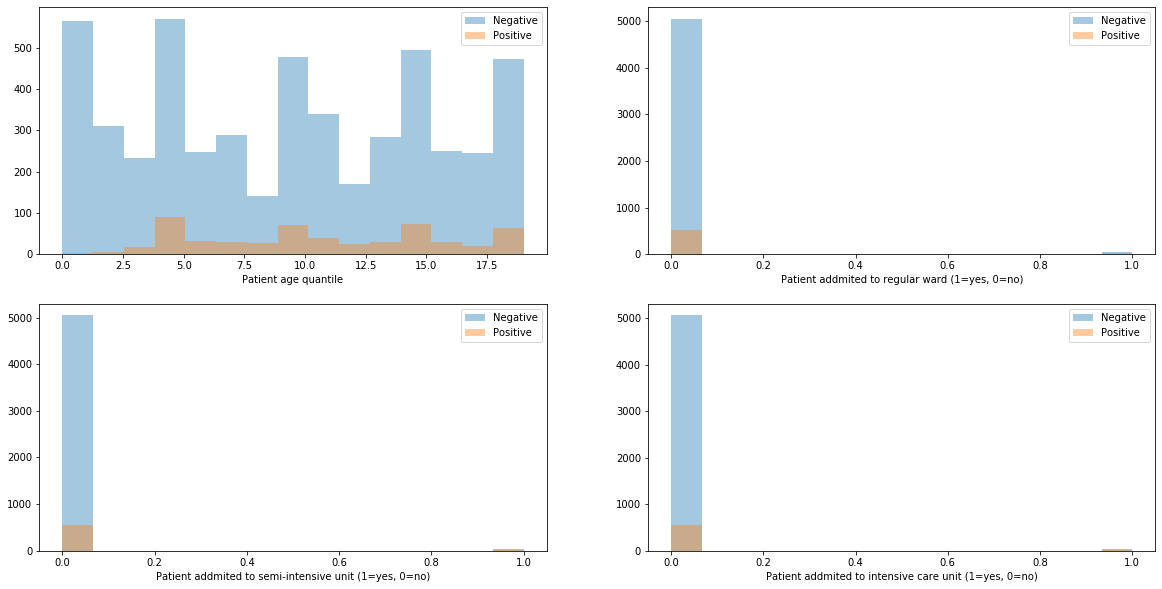

In [8]:
# agora eu vou tentar plotar uns histogramas pra eu pensar sobre
# isso é confuso, mas a verdade é que eu só copio e colo de outros notebooks que tenho
# com o tempo você pega o jeito do copy/paste
df_neg = df[df['SARS-Cov-2 exam result'] == 'negative']
df_pos = df[df['SARS-Cov-2 exam result'] == 'positive']
series_without_null = (df.isnull().sum() == 0)
columns_without_null = series_without_null[series_without_null == True].index
columns_without_null = columns_without_null[1:]
columns_without_null = columns_without_null.tolist()
columns_without_null.remove('SARS-Cov-2 exam result')

plt.figure()
fig, ax = plt.subplots(2, 2, figsize=(20,10))

i = 0    
for col in columns_without_null:
    i += 1
    # essa biblioteca seaborn é o bixo!
    # já tinha falado pro cícero, mas os cara não escuta
    # gráfico sai bonitão, vai vendo
    plt.subplot(2, 2, i)
    sns.distplot(df_neg[col], label="Negative", bins=15, kde=False)
    sns.distplot(df_pos[col], label="Positive", bins=15, kde=False)
    plt.legend()
plt.show()

In [9]:
# é galera
# esse gráfico não diz muita coisa, mas enfim, isso é só um procedimento padrão
# vou fazer uma análise exploratória
# that's all folks!

In [10]:
# é bom deixar todos os dados numéricos
# o computador interpreta melhor features numéricas
# vou fazer aqui de um jeito que entendam minhas transformações
categories_object = df.dtypes[df.dtypes == object].index
categories_object = categories_object.tolist()
categories_object.remove('Patient ID')
categories_object

['SARS-Cov-2 exam result',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Strepto A',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - pH',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Leukocytes',
 'Urine - Crystals',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylinders',
 'Urine - Yeasts',
 'Urine - Color']

In [11]:
for category in categories_object:
    df_category = df[category].astype('category')
    print(df_category.cat.categories)

Index(['negative', 'positive'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['detected', 'not_detected'], dtype='object')
Index(['not_detected'], dtype='object')
Index(['negative', 'positive'], dtype='object')
Index(['negative', 'positive'], 

In [12]:
# isso é demorado
# vocês aí que terminaram cdados sabem um jeito mais fácil?
df = df.replace({'positive':1,'negative':0})
df = df.replace({'detected':1,'not_detected':0})
df = df.replace({'not_done': 0, 'absent': 1, 'present': 2})
df = df.replace({'altered_coloring':0,'clear':1,'cloudy':2,'lightly_cloudy':3})
df = df.replace({'normal': 1})
df = df.replace({'light_yellow': 1, 'yellow': 2, 'citrus_yellow': 3, 'orange': 4})
df = df.replace({'Não Realizado': 0})
df = df.replace({'<1000': 1000})
df = df.replace({'Ausentes': 1, 'Urato Amorfo --+': 0, 'Oxalato de Cálcio +++': 0, 'Oxalato de Cálcio -++': 0, 'Urato Amorfo +++': 0})
# rodando a célula de novo
# tinha esquecido de transformar esses caras em float
# não esqueçam isso, crianças
# o computador fica muito irritado se ele ver um número se dizendo de string
df['Urine - pH'] = df['Urine - pH'].astype('float')
df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype('float')

In [13]:
# já que a gente só tem um dataset eu mesmo vou criar um de treino e teste
from sklearn.model_selection import train_test_split
# nostalgia do hands-on...
# vou usar até o mesmo random_state do ageron
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
4680,5ae49b7c4583a5f,9,1,0,0,0,0.900284,1.105468,-0.605346,0.683835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,42f9a21872c655f,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,78df291478c439a,14,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,51d9f4f0d6a1c71,0,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,9b3ac6abc56b4d5,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,5159a43da3193e9,12,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5191,aa1a5aa2441bc13,19,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5226,482a960eb07d3cd,16,1,0,0,1,-0.427254,-0.210308,-1.271122,-0.325903,...,1.294485,-0.138313,0.666165,0.342491,0.495581,0.549617,2.087693,-1.475128,NaN,0.182693
5390,d50b6f40b4545b3,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_test

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
1694,5541f42a107f084,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4434,d312238aa508c24,14,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3297,23b19225d2fdd4c,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3980,63aeba2b01cb895,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4165,b90320c6c7bbb1e,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,078780a7f821654,18,0,0,0,0,0.946061,0.854844,-0.718402,0.908221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2445,460abf1fc98bbe4,9,0,0,0,0,-0.473031,-0.774212,0.663397,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,08e04abcd2027c8,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,b431d81c05626fa,0,0,0,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# nice! Agora eu só vou treinar o modelo
X_train = df_train.drop(['Patient ID','Patient addmited to regular ward (1=yes, 0=no)',
                        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                        'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)
y_train = df_train.loc[:,['Patient addmited to regular ward (1=yes, 0=no)',
                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                    'Patient addmited to intensive care unit (1=yes, 0=no)']]
# é bom dar um replace nos NaNs, o modelo não reconhece eles
# ao escolher um valor tão alto, o modelo reconhece que isso é um absurdo
X_train.fillna(99999, inplace=True)

In [16]:
# escolhi um decision tree de leve
# afinal ainda é terça... ? Talvez quarta, não sei. Quarentena
# deixa o random forest pra sexta a noite
# dia de perdição
DTClassifier = DecisionTreeClassifier(max_depth=5)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
X_test = df_test.drop(['Patient ID','Patient addmited to regular ward (1=yes, 0=no)',
                        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                        'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)
y_test = df_test.loc[:,['Patient addmited to regular ward (1=yes, 0=no)',
                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                    'Patient addmited to intensive care unit (1=yes, 0=no)']]
X_test.fillna(99999, inplace=True)

In [18]:
# agora é só eu fazer predições e tirar o erro e...
# MANO, QUE PORCARIA! QUERO DIZER! NUNCA VI UM MODELO TÃO RUIM!
# mas é isso, vou pensar em jeitos de melhorar isso depois
from sklearn.metrics import mean_squared_error

y_predict = DTClassifier.predict(X_test)
print(mean_squared_error(y_predict,y_test))

0.012695600826690287


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRkuP6fPWcEx28NjiDYqSdZfBDNzePFqn4Uu_sKsOCyzwUHXSmX&usqp=CAU">